In [2]:
import pandas as pd
import seaborn as sns
import datetime 

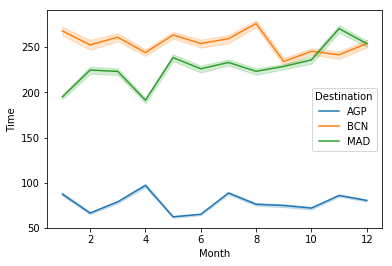

In [3]:
col_list=['Date','Time','Destination']
c_size = 500000
chunk_toplot = pd.DataFrame()

for gm_chunk in pd.read_csv('searches.csv.bz2',compression='bz2',chunksize=c_size,sep='^',usecols=col_list):
    
    gm_chunk['Date'] = pd.to_datetime(gm_chunk['Date'],format="%Y-%d-%m",errors='coerce')
    gm_chunk['Month'] = pd.DatetimeIndex(gm_chunk['Date']).month
    #print('month column')
    
    chunk_grouped = gm_chunk.groupby(['Destination','Month'])['Time'].count()
    chunk_grouped = chunk_grouped.reset_index()
    #print('tabla agrupada')
    
    filtered_chunk = chunk_grouped.where(chunk_grouped['Destination'].isin(['MAD','AGP','BCN']) == True).dropna()
    #print('condiciones')
    
    filtered_chunk = filtered_chunk.reset_index(drop=True)
    chunk_toplot = chunk_toplot.append(filtered_chunk)
    #print('tablas a plotear unidas')

    
        
        
sns.lineplot(data=chunk_toplot, x='Month', y='Time', hue='Destination');